## LED Frequencies
- Blue: 470 (460-475) nm
- Green: (520-525) nm
- Red: 623 (620-630) nm
- Yellow: 589 (585-595) nm

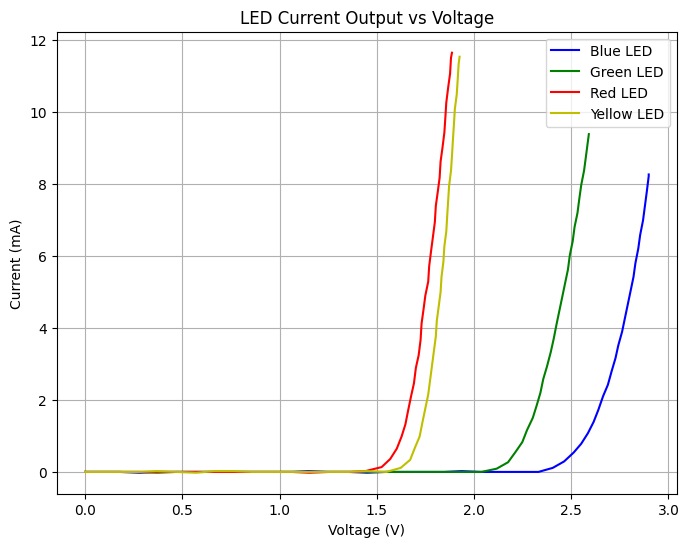

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import glob
import os

# Get all '2e' csv files in the data directory
data_dir = '../data'
csv_files = glob.glob(os.path.join(data_dir, '2e_*.csv'))
colors = {'blue': 'b', 'green': 'g', 'red': 'r', 'yellow': 'y'}
plt.figure(figsize=(8,6))
for file in csv_files:
    # Extract LED color from filename
    color = file.split('_')[-2].replace('.csv','')
    df = pd.read_csv(file)
    plt.plot(df.iloc[:,2], df.iloc[:,-1], label=f'{color.capitalize()} LED', color=colors.get(color, None))
plt.xlabel('Voltage (V)')
plt.ylabel('Current (mA)')
plt.title('LED Current Output vs Voltage')
plt.legend()
plt.grid(True)
plt.show()

In [12]:
from scipy.constants import c, e

def i_dunno_yet(x):
    return c / (x * e)

In [26]:
# Determine energy for a single LED
E_blue = e * 2.4291  # Joules = e * V = hc/lambda
                     # h = E * lambda / c
                     # h = e * V * lambda / c
                     # V = h * c / e * (lambda) 

print(e * 2.4291 * 470e-9 / c) 

6.101448399262992e-34


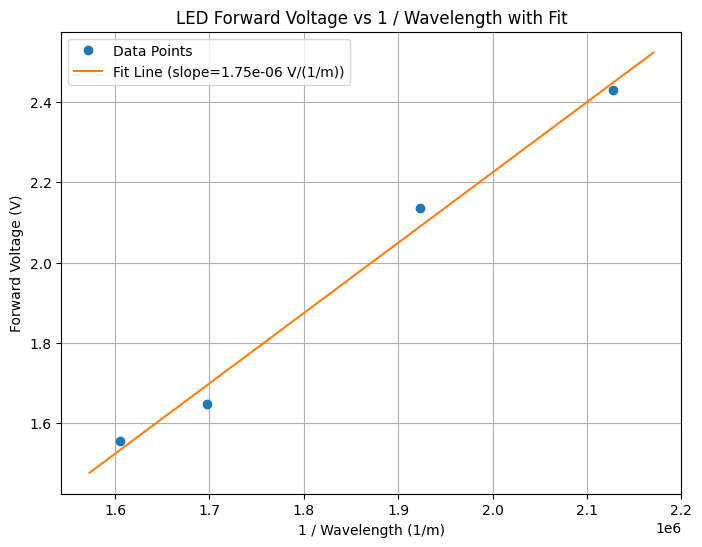

Estimated Planck's constant: h = 9.366e-34 J·s
Fit coefficients: [ 1.75258967e-06 -1.28038969e+00]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.constants import c, e

# LED forward voltages (V) and wavelengths (m)
blue_vf = 2.4291
green_vf = 2.1359
yellow_vf = 1.6471
red_vf = 1.5543
wavelengths = [470e-9, 520e-9, 589e-9, 623e-9]
vfs = [blue_vf, green_vf, yellow_vf, red_vf]
# Calculate inverse wavelengths
inverse_wavelengths = [1 / wl for wl in wavelengths]
# Fit line to data
coefficients = np.polyfit(inverse_wavelengths, vfs, 1)
polynomial = np.poly1d(coefficients)
x_fit = np.linspace(min(inverse_wavelengths)*0.98, max(inverse_wavelengths)*1.02, 1000)
y_fit = polynomial(x_fit)
plt.figure(figsize=(8,6))
plt.plot(inverse_wavelengths, vfs, 'o', label='Data Points')
plt.plot(x_fit, y_fit, '-', label=f'Fit Line (slope={coefficients[0]:.2e} V/(1/m))')
plt.xlabel('1 / Wavelength (1/m)')
plt.ylabel('Forward Voltage (V)')
plt.title('LED Forward Voltage vs 1 / Wavelength with Fit')
plt.legend()
plt.grid(True)
plt.show()
# Calculate Planck's constant from the slope
slope = coefficients[0]
h_est = slope * e / c
print(f"Estimated Planck's constant: h = {h_est:.3e} J·s")
print(f"Fit coefficients: {coefficients}")